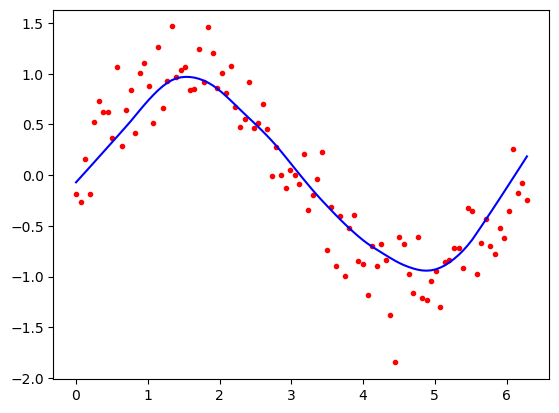

In [20]:
import math
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
def lowesss(x,y,f,iterations):
    n=len(x)
    r=int(math.ceil(f*n))
    h=[np.sort(np.abs(x-x[i]))[r] for i in range(n)]
    w=np.clip(np.abs(x[:,None]-x[None,:])/h,0.0,1.0)
    w=(1-w**3)**3
    delta=np.ones(n)
    yest=np.zeros(n)
    for iterations in range(iterations):
        for i in range(n):
            weight=delta*w[:,i]
            b=np.array([np.sum(weight*y),np.sum(weight*x*y)])
            a=np.array([[np.sum(weight),np.sum(weight*x)],[np.sum(weight*x),np.sum(weight*x*x)]])
            beta=linalg.solve(a,b)
            yest[i]=beta[0]+beta[1]+x[i]
        residuals=y-yest
        s=np.median(np.abs(residuals))
        delta=np.clip(residuals/(s*6.0),-1,1)
        delta=(1-delta**2)**2
    return yest

n=100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f=0.25
iterations=3
lowesss(x,y,f,iterations)
plt.plot(x,y,'r.')
plt.plot(x, yest ,'b-')
plt.show()